[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\traor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Longueur du corpus: 1
Extrait du corpus: violences urbaines communes villes victimes dun relatif désengagement létat estime lamf renforts police envoyés dimanche béziers veille limoges homme poignardé rennes autre tué balle havre violences u
['accentuer' 'ainsi' 'alléger' 'alors' 'amf' 'amènent' 'ans'
 'apparaissent' 'appelle' 'après' 'associations' 'auch' 'aussi' 'autre'
 'balle' 'beaucoup' 'béziers' 'calmes' 'car' 'certain' 'certainement'
 'certaines' 'cest' 'collectivités' 'comme' 'communes' 'concerne'
 'considère' 'consommateur' 'consommateurs' 'constater' 'contre' 'courtes'
 'couvrefeu' 'dautant' 'dehors' 'demande' 'dendiguer' 'deux' 'difficultés'
 'dimanche' 'dispositif' 'drogue' 'dun' 'délinquant' 'délitement'
 'déliter' 'démission' 'dénonce' 'département' 'départements' 'déplore'
 'désarroi' 'désengagement' 'désormais' 'efforts' 'enfants' 'enfin'
 'enlevé' 'envoyés' 'estime' 'etc' 'explosions' 'expose' 'exprimé'
 'extrêmement' 'face' 'faire' 'fait' 'familles' 'faut' 'ferme'
 'f

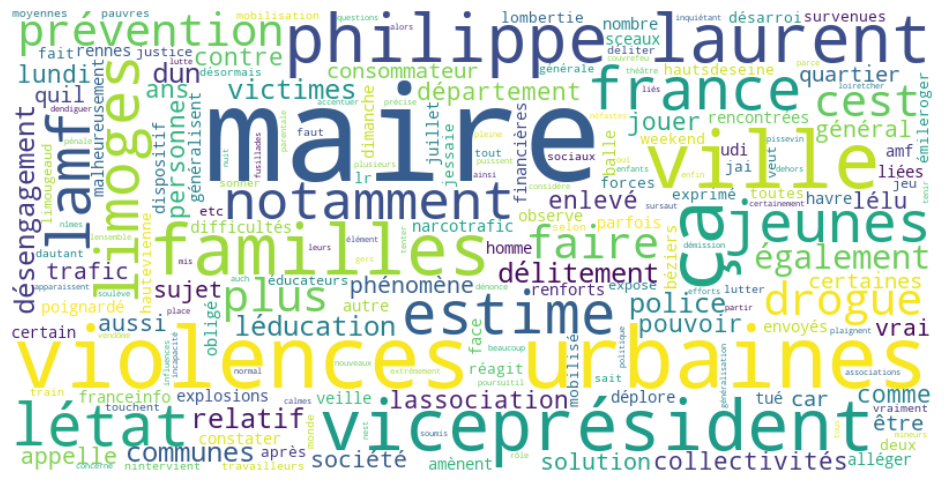

In [31]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Charger le texte
with open("Article_presse.txt", "r", encoding="utf-8") as f:
    texte = f.read()

# Mise en minuscules
texte_min = texte.lower()

# Nettoyage ponctuation
texte_nettoye = re.sub(r'[^\w\s]', '', texte_min)

# Stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("french"))

# Tokenisation + suppression stopwords
mots = texte_nettoye.split()
mots_sans_stop = [w for w in mots if w not in stop_words]

# Remplacer les chiffres par "NUM"
texte_final = " ".join(mots_sans_stop)
texte_final = re.sub(r"\d+", "NUM", texte_final)

# Construire le corpus
corpus = [texte_final]

print("Longueur du corpus:", len(corpus))
print("Extrait du corpus:", corpus[0][:200])

# CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

# TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

# spaCy
nlp = spacy.load("fr_core_news_md")
doc = nlp(texte_final)
for token in doc:
    print(token.text, token.vector[:10])

# WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=200,
    colormap="viridis"
).generate(" ".join(mots_sans_stop))

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()